In [143]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


def scrap_b4_2017(slis):
    dflis = []
    for l in slis:
        url0 = 'https://www.nbastuffer.com/{}-nba-regular-season-advanced-stats/'.format(l)
        sess = requests.session()
        page0 = sess.get(url0)
        soup0 = BeautifulSoup(page0.content, "lxml")
        soup0.prettify()
        all_table = soup0.find_all('table')
        season_table0 = all_table[0]
        d = pd.read_html(str(season_table0))[0]
        d = pd.DataFrame(d)
        d.columns = d.columns.droplevel(0)
        dd = d[['Team', 'PPG','OEFF','OPPG', 'DEFF', 'WIN']]
        dd = dd[3:]
        dflis.append(dd)
    
    return dflis



def scrap_2017_2018(season):
    url1 = 'https://www.nbastuffer.com/{}-nba-team-stats/'.format(season)
    sess = requests.session()
    page1 = sess.get(url1)
    soup1 = BeautifulSoup(page1.content, "lxml")
    soup1.prettify()
    all_table1 = soup1.find_all('table')
    season_table1 = all_table1[1]
    df1819 = pd.read_html(str(season_table1))[0]
    
    return df1819


def scrap_current(current):
    url2 = 'https://www.nbastuffer.com/{}-nba-team-stats/'.format(current)
    page2 = sess.get(url2)
    soup2 = BeautifulSoup(page2.content, "lxml")
    soup2.prettify()
    all_table2 = soup2.find_all('table')
    season_table2 = all_table2[0]
    df_current = pd.read_html(str(season_table2))[0]
    return df_current

In [144]:

def clean_2017_2018(df):
    df_prev_cln = df[['TEAM','PTS/GMPoints Per GameAverage points per game',
                      'aPTS/GMPoints Allowed Per GameAverage points allowed per game',
                      'OEFFOffensive EfficiencyPoints scored per 100 possessions.','DEFFDefensive EfficiencyPoints allowed per 100 possessions.',
                      'WWinsThe most important goal in sports, unless your team is not tanking']]
    df_prev_cln.rename(columns={'TEAM':'Team','PTS/GMPoints Per GameAverage points per game':'PPG',
                                'aPTS/GMPoints Allowed Per GameAverage points allowed per game':'OPPG',
                                'OEFFOffensive EfficiencyPoints scored per 100 possessions.': 'OEFF',
                                'DEFFDefensive EfficiencyPoints allowed per 100 possessions.': 'DEFF',
                                'WWinsThe most important goal in sports, unless your team is not tanking':'WIN'}, inplace=True)
    return df_prev_cln


In [145]:
p = '2015-2016'
pp = '2016-2017'
ppp = '2017-2018'
prevseason = '2018-2019'
thisseason = '2019-2020'
szslis =[p,pp] 

old_lis = scrap_b4_2017(szslis)
df1718 = clean_2017_2018(scrap_2017_2018(ppp))
df1819 = clean_2017_2018(scrap_2017_2018(prevseason))

C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [146]:
old_lis.append(df1718)

pdf = pd.concat(old_lis, axis=0, sort=False)


In [147]:
def abbrev_city(df):
    mapp = {'Atlanta': 'ATL',
           'Boston': 'BOS',
            'Brooklyn': 'BKN',
           'Charlotte': 'CHA',
           'Chicago': 'CHI',
           'Cleveland': 'CLE',
           'Dallas': 'DAL',
           'Denver': 'DEN',
           'Detroit': 'DET',
           'Golden State': 'GSW',
           'Houston': 'HOU',
           'Indiana': 'IND',
           'LA Clippers': 'LAC',
           'LA Lakers': 'LAL',
           'Memphis': 'MEM',
           'Miami': 'MIA',
           'Milwaukee': 'MIL',
           'Minnesota': 'MIN',
           'New Orleans': 'NOP',
           'New York': 'NYK',
           'Oklahoma City': 'OKC',
           'Orlando': 'ORL',
           'Philadelphia': 'PHI',
           'Phoenix': 'PHX',
           'Portland': 'POR',
           'Sacramento': 'SAC',
           'San Antonio': 'SAS',
           'Toronto': 'TOR',
           'Utah': 'UTA',
           'Washington': 'WAS'}
    
    df['Team'] = df.Team.map(mapp)
    return df


In [148]:
olddf = abbrev_city(pdf)
newdf = abbrev_city(df1819)


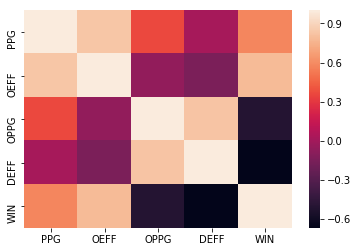

In [149]:
data = olddf.corr()

ax = sns.heatmap(data)

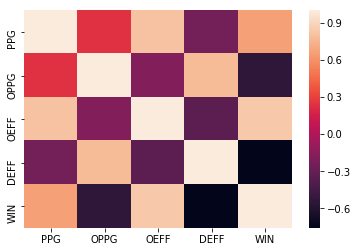

In [150]:
data = newdf.corr()

ax = sns.heatmap(data)

In [151]:
def BOTH_reg(dfp, dfc):
    
    dfpT = dfp[['OEFF','PPG', 'OPPG', 'DEFF', 'WIN']]
    dfcT = dfc[['OEFF', 'PPG', 'OPPG', 'DEFF', 'WIN']]
    
    train_x = dfpT#[['OEFF', 'DEFF']]
    train_y = train_x['WIN']
    test_x = dfcT#[['OEFF', 'DEFF']]
    test_y = test_x['WIN']
    train_x.drop('WIN', axis=1, inplace=True)
    test_x.drop('WIN', axis=1, inplace=True)

    reg = LinearRegression().fit(train_x, train_y)

    y_pred = reg.predict(test_x)

    dfc['Predicted W based Both'] = y_pred
    accur1 = reg.score(test_x, test_y)
    print('test accuracy:',accur1)
    pred2 = reg.predict(train_x)
    accur2 = reg.score(train_x,train_y)
    print('train accuracy:',accur2)

    return dfc
BOTH_reg(olddf, df1819)

test accuracy: 0.951537716645821
train accuracy: 0.9368776064521988


C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Team,PPG,OPPG,OEFF,DEFF,WIN,Predicted W based Both
0,ATL,113.3,119.4,108.2,113.9,29,24.864663
1,BOS,112.4,108.0,112.3,107.8,49,52.516927
2,BKN,112.2,112.3,109.6,109.7,42,40.766274
3,CHA,110.7,111.8,111.4,112.5,39,38.374021
4,CHI,104.9,113.4,104.8,113.2,22,18.756217
5,CLE,104.5,114.1,107.7,117.6,19,16.486258
6,DAL,108.9,110.1,109.4,110.7,33,38.047823
7,DEN,110.7,106.7,113.0,108.9,54,51.577366
8,DET,107.0,107.3,109.0,109.2,41,40.213037
9,GSW,117.7,111.2,116.0,109.6,57,58.310783


In [152]:
def OEFF_reg(dfp,dfc):
    
    dfpT = dfp[['OEFF','PPG', 'OPPG', 'DEFF', 'WIN']]
    dfcT = dfc[['OEFF', 'PPG', 'OPPG', 'DEFF', 'WIN']]
    
    train_x = dfpT[['OEFF', 'PPG', 'WIN']]
    train_y = train_x['WIN']
    test_x = dfcT[['OEFF', 'PPG', 'WIN']]
    test_y = test_x['WIN']
    train_x.drop('WIN', axis=1, inplace=True)
    test_x.drop('WIN', axis=1, inplace=True)

    reg = LinearRegression().fit(train_x, train_y)

    y_pred = reg.predict(test_x)
    
    accur1 = reg.score(test_x, test_y)
    print('test accuracy:',accur1)
    pred2 = reg.predict(train_x)
    accur2 = reg.score(train_x,train_y)
    print('train accuracy:',accur2)
    
    dfc['Predic W based of OEFF'] = y_pred
    
    return dfc

OEFF_reg(olddf,df1819)

test accuracy: 0.5602620025944991
train accuracy: 0.6451932482653715


C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Team,PPG,OPPG,OEFF,DEFF,WIN,Predicted W based Both,Predic W based of OEFF
0,ATL,113.3,119.4,108.2,113.9,29,24.864663,35.287722
1,BOS,112.4,108.0,112.3,107.8,49,52.516927,51.027101
2,BKN,112.2,112.3,109.6,109.7,42,40.766274,41.279462
3,CHA,110.7,111.8,111.4,112.5,39,38.374021,49.049879
4,CHI,104.9,113.4,104.8,113.2,22,18.756217,29.358448
5,CLE,104.5,114.1,107.7,117.6,19,16.486258,40.306934
6,DAL,108.9,110.1,109.4,110.7,33,38.047823,43.115817
7,DEN,110.7,106.7,113.0,108.9,54,51.577366,54.918556
8,DET,107.0,107.3,109.0,109.2,41,40.213037,43.128310
9,GSW,117.7,111.2,116.0,109.6,57,58.310783,60.470939


In [153]:
def DEFF_reg(dfp,dfc):
    
    dfpT = dfp[['OEFF','PPG', 'OPPG', 'DEFF', 'WIN']]
    dfcT = dfc[['OEFF', 'PPG', 'OPPG', 'DEFF', 'WIN']]
    
    train_x = dfpT[['DEFF', 'OPPG', 'WIN']]
    train_y = train_x['WIN']
    test_x = dfcT[['DEFF', 'OPPG', 'WIN']]
    test_y = test_x['WIN']
    train_x.drop('WIN', axis=1, inplace=True)
    test_x.drop('WIN', axis=1, inplace=True)

    reg = LinearRegression().fit(train_x, train_y)

    y_pred = reg.predict(test_x)
    accur1 = reg.score(test_x, test_y)
    print('test accuracy:',accur1)
    pred2 = reg.predict(train_x)
    accur2 = reg.score(train_x,train_y)
    print('train accuracy:',accur2)
    
    dfc['Predic W based of DEFF'] = y_pred
    
    return dfc
DEFF_reg(olddf,df1819)

test accuracy: 0.34529846344004844
train accuracy: 0.45119559841551804


C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Team,PPG,OPPG,OEFF,DEFF,WIN,Predicted W based Both,Predic W based of OEFF,Predic W based of DEFF
0,ATL,113.3,119.4,108.2,113.9,29,24.864663,35.287722,26.904483
1,BOS,112.4,108.0,112.3,107.8,49,52.516927,51.027101,42.895237
2,BKN,112.2,112.3,109.6,109.7,42,40.766274,41.279462,38.236528
3,CHA,110.7,111.8,111.4,112.5,39,38.374021,49.049879,28.432407
4,CHI,104.9,113.4,104.8,113.2,22,18.756217,29.358448,26.722827
5,CLE,104.5,114.1,107.7,117.6,19,16.486258,40.306934,11.954949
6,DAL,108.9,110.1,109.4,110.7,33,38.047823,43.115817,33.866193
7,DEN,110.7,106.7,113.0,108.9,54,51.577366,54.918556,38.569274
8,DET,107.0,107.3,109.0,109.2,41,40.213037,43.128310,37.799755
9,GSW,117.7,111.2,116.0,109.6,57,58.310783,60.470939,38.106191


In [111]:
#NOTHING BELOW THIS LINE

In [104]:
def bar_plot(df):
    
    
    objects = df.Team
    
    for col in df.columns:
        if col != 'Team':
            performance = df[col]
            y_pos = np.arange(len(objects))


            plt.figure(figsize=(25,10))
            plt.bar(y_pos, performance, align='center', alpha=0.5)
            plt.xticks(y_pos, objects)
            plt.title('{} PER TEAM'.format(col))
        else:
            None

